<a href="https://colab.research.google.com/github/KarthikeyanBaskaran/SupplyChain-Analytics/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/KarthikeyanBaskaran/SupplyChain-Analytics/refs/heads/main/Rider-Info.csv')

#### EDA

In [21]:
df.head(2)

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN


In [22]:
datetime_cols = [
    'order_time', 'order_date', 'allot_time', 'accept_time',
    'pickup_time', 'delivered_time', 'cancelled_time'
]

datecol = []
timecol = []

# Split each datetime column into date and time parts
for col in datetime_cols:
    df[f'{col}_date'] = pd.to_datetime(df[col], errors='coerce').dt.date
    datecol.append(f'{col}_date')
    df[f'{col}_time'] = pd.to_datetime(df[col], errors='coerce').dt.time
    timecol.append(f'{col}_time')

# Create 'same_day_delivery' column: True if all non-null dates in row are the same
df['same_day_delivery'] = df[datecol].apply(lambda row: len(set(row.dropna())) == 1,axis=1)

In [47]:
for col in datecol:
    df[col] = pd.to_datetime(df[col], errors='coerce')

for col in datecol:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df['allot_time'] = pd.to_datetime(df['allot_time'], errors='coerce')
df['accept_time'] = pd.to_datetime(df['accept_time'], errors='coerce')
df['order_id'] = df['order_id'].astype('object')
df['rider_id'] = df['rider_id'].astype('object')


In [24]:
df.isnull().sum()

,0
order_time,0
order_id,0
order_date,0
allot_time,0
accept_time,157
pickup_time,2421
delivered_time,5218
rider_id,0
first_mile_distance,0
last_mile_distance,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450000 entries, 0 to 449999
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   order_time            450000 non-null  object        
 1   order_id              450000 non-null  object        
 2   order_date            450000 non-null  object        
 3   allot_time            450000 non-null  datetime64[ns]
 4   accept_time           449843 non-null  datetime64[ns]
 5   pickup_time           447579 non-null  object        
 6   delivered_time        444782 non-null  object        
 7   rider_id              450000 non-null  object        
 8   first_mile_distance   450000 non-null  float64       
 9   last_mile_distance    450000 non-null  float64       
 10  alloted_orders        433813 non-null  float64       
 11  delivered_orders      432659 non-null  float64       
 12  cancelled             450000 non-null  int64         
 13 

In [26]:
# Fill blanks in 'alloted_orders' with 'lifetime_order_count' where 'lifetime_order_count' < 2
df.loc[(df['lifetime_order_count'] < 5)&(df['alloted_orders'].isna()), 'alloted_orders'] = df['lifetime_order_count']
df.loc[(df['alloted_orders'] < 5) & (df['lifetime_order_count'].isna()),
    'lifetime_order_count'] = df['alloted_orders']

In [27]:
df.isnull().sum() * 100 / len(df)

,0
order_time,0.000000
order_id,0.000000
order_date,0.000000
allot_time,0.000000
accept_time,0.034889
pickup_time,0.538000
delivered_time,1.159556
rider_id,0.000000
first_mile_distance,0.000000
last_mile_distance,0.000000


In [22]:
df['accept_time_date'].unique()

array([datetime.date(2021, 1, 26), NaT, datetime.date(2021, 1, 27),
       datetime.date(2021, 1, 28), datetime.date(2021, 1, 29),
       datetime.date(2021, 1, 30), datetime.date(2021, 1, 31),
       datetime.date(2021, 2, 1), datetime.date(2021, 2, 2),
       datetime.date(2021, 2, 3), datetime.date(2021, 2, 4),
       datetime.date(2021, 2, 5), datetime.date(2021, 2, 6)], dtype=object)

In [30]:
df['accept_delay'] = (df['accept_time'] - df['allot_time']).dt.total_seconds()

In [48]:
# Select columns for numerical analysis
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['first_mile_distance', 'last_mile_distance', 'alloted_orders',
       'delivered_orders', 'cancelled', 'undelivered_orders',
       'lifetime_order_count', 'reassigned_order', 'session_time',
       'accept_delay'],
      dtype='object')

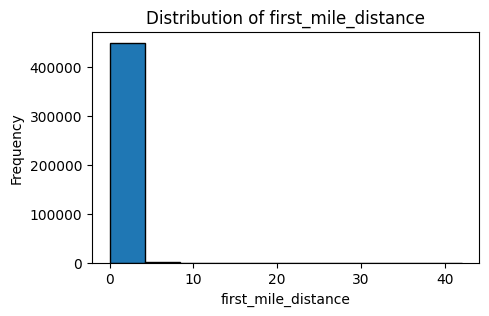

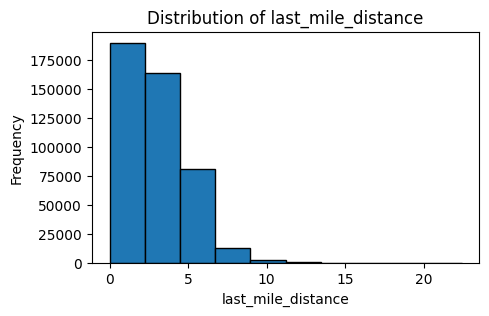

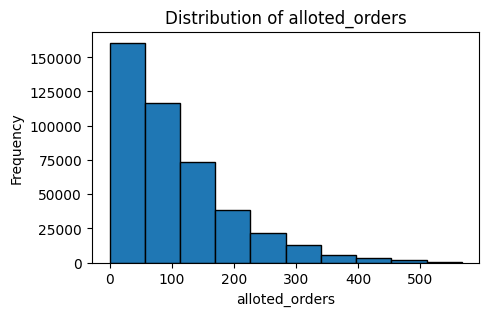

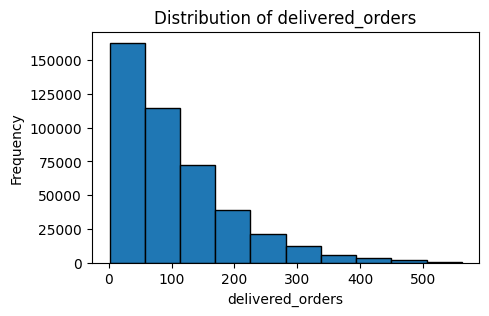

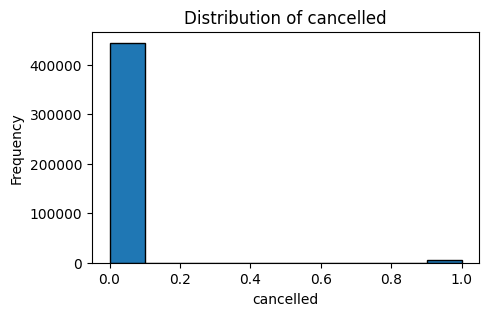

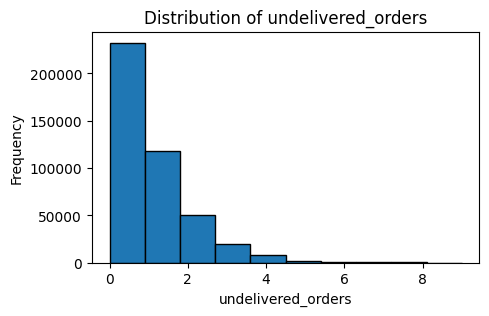

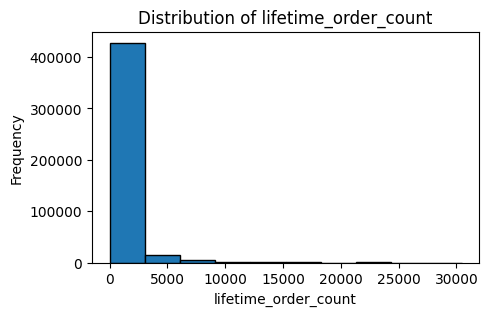

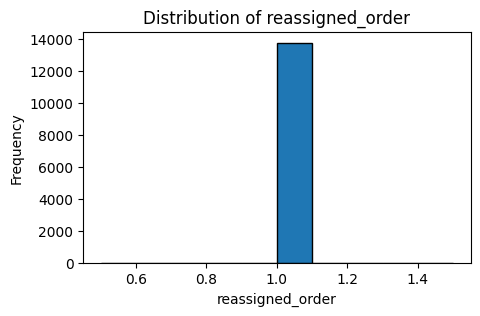

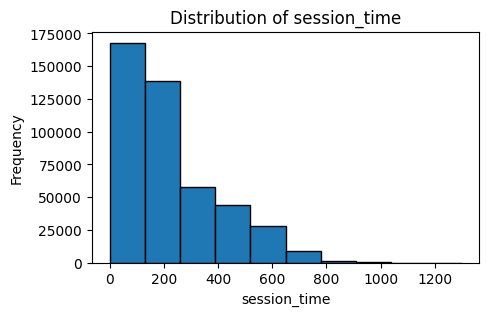

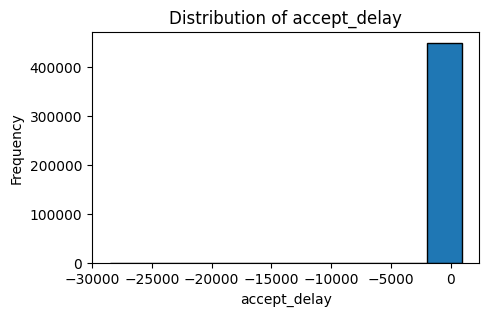

In [49]:

import matplotlib.pyplot as plt
for i in numerical_cols:
  # Assuming 'column_name' is the name of the column you want to visualize
  # column_name = 'alloted_orders'  # Replace with your actual column name

  # Create the histogram
  plt.figure(figsize=(5, 3))  # Adjust figure size if needed
  plt.hist(df[i].dropna(), bins=10, edgecolor='black') # Adjust bins as needed
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {i}')
  plt.show()


In [39]:

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'PMF of {col}')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7d7777a62700> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d7777a60360> (for post_execute):


KeyboardInterrupt: 

In [38]:
feature_stats = df.describe().T[['mean', 'std']]
feature_stats['variance'] = feature_stats['std'] ** 2

print(feature_stats)

                               mean            std      variance
order_id              369143.080767  131146.906408  1.719951e+10
rider_id                7763.244016    5592.880135  3.128031e+07
first_mile_distance        1.229889       0.846183  7.160250e-01
last_mile_distance         2.968873       1.884124  3.549922e+00
alloted_orders           104.620909      90.135492  8.124407e+03
delivered_orders         103.950448      89.639646  8.035266e+03
cancelled                  0.011596       0.107057  1.146112e-02
undelivered_orders         0.764165       1.066473  1.137366e+00
lifetime_order_count     853.640664    1502.976162  2.258937e+06
reassigned_order           1.000000       0.000000  0.000000e+00
session_time             220.474779     176.713853  3.122779e+04
